In [1]:
#Classification Algorithm 
#1. Logistic Regression
#2. Decision Tree classifier
'''1. Gini Index 2. Entropy'''
#Example of DecisionTREEClassifier on bank.csv file 
#bank.csv file 

'1. Gini Index 2. Entropy'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#To load dataset  (advertising.csv)
df=pd.read_csv("C:/Users/arohi/.jupyter/bank.csv") #df user defined object or dataframe

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [5]:
df.shape

(11162, 17)

In [8]:
#check null value
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [12]:
#target means output variable:deposit
#seprate input and output variable from dataframe
X=df.drop("deposit",axis=1) # or X=df.iloc[:,:-1]
Y=df["deposit"] #or Y=df.iloc[:,-1]

In [13]:
#Train_Test_split
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [16]:
#create user defined function
def create_model(model): #passing arguments model : object
    model.fit(X_train,Y_train) #train the model with 70% data
    Y_pred=model.predict(X_test) #test the model
    print(classification_report(Y_test,Y_pred))
    return model
    

In [17]:
#Createing a baseline model 
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [18]:
#Create the object of LogisticRegression 
lr=LogisticRegression() 

In [19]:
#classification_report inbuilt class
from sklearn.metrics import classification_report

In [20]:
#call function
create_model(lr)

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1760
           1       0.76      0.73      0.75      1589

    accuracy                           0.77      3349
   macro avg       0.77      0.76      0.77      3349
weighted avg       0.77      0.77      0.77      3349



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
#recall =0.73 good not better
#region : model is overfitting so. less recall then do data analysis 
#but not work on data analysis then use decisiontreeclassifier
#because DT : select imp features means select best features 

In [22]:
#USE DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
#create object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier()  #by default GINI Index

In [25]:
#call function 
#train and test the model with DT
create_model(dt1) 

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.76      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
#recall=0.77 it is better than Logistic regression but not much better
#region : model is overfitting

In [27]:
#Check important features then use inbuilt method feature_importances_
#feature_importances_  define in DecisionTreeClassifier class
dt1.feature_importances_
 #Its return a array of scores 
    #reduction =Gini index of complete dataset-gini index of each features
#select whose reduction is high and gini index should be less 

array([0.08237769, 0.03380154, 0.01764979, 0.01321457, 0.00045636,
       0.08496003, 0.04257211, 0.00581529, 0.06161314, 0.07994088,
       0.09926334, 0.35058395, 0.01928648, 0.05744755, 0.00781116,
       0.04320611])

In [28]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [29]:
#tree draw
from sklearn import tree

In [30]:
features=X.columns
print("Input variables : ",features)

Input variables :  Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


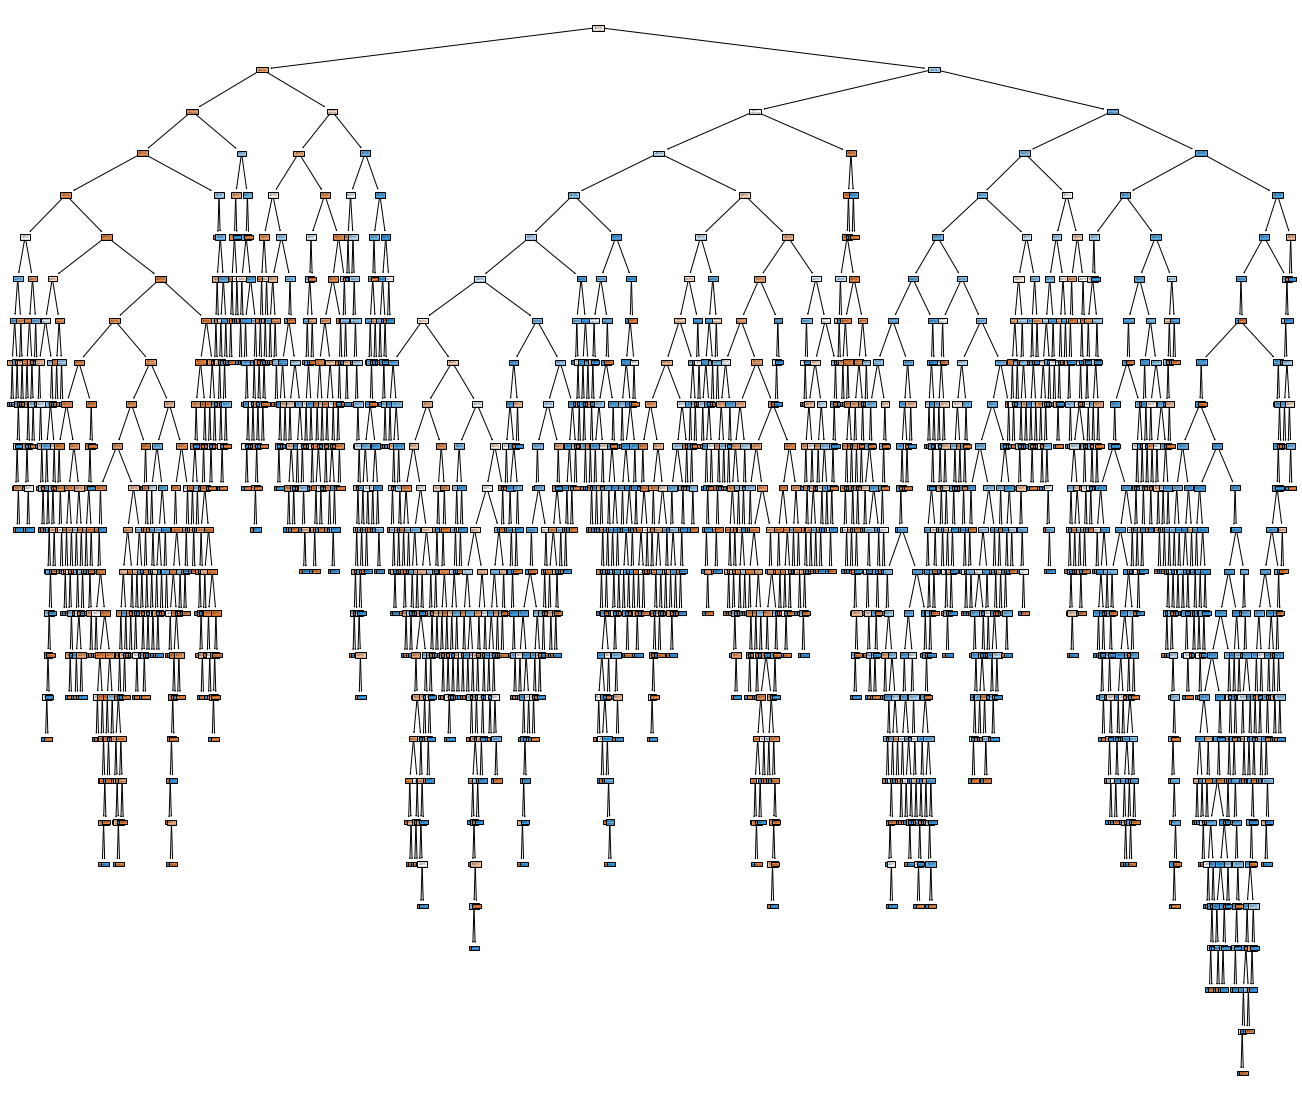

In [31]:
fig=plt.figure(figsize=(23,20)) 
#23 width and 20 height :define graph's page size
_=tree.plot_tree(dt1,feature_names=features,filled=True)
#tree_plot() inbuilt function of tree class

# How we reduced a overfitting situation by using the pruning technique

In [32]:
#There are various types of pruning technique 
#1. First pruning technique  : With the help of max_depth()

In [33]:
#create object of DecisionTreeClassifier() and passing argument max_depth
#max_depth can not be more than 8 , can be <=8

In [34]:
#create object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(max_depth=3)  #by default GINI Index

In [37]:
#call function
create_model(dt2)

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      1760
           1       0.71      0.86      0.78      1589

    accuracy                           0.77      3349
   macro avg       0.78      0.78      0.77      3349
weighted avg       0.78      0.77      0.77      3349



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
dt2.feature_importances_

array([0.03429936, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.13912344, 0.        ,
       0.        , 0.70308429, 0.        , 0.05817158, 0.        ,
       0.06532133])

In [39]:
dt2.feature_importances_

array([0.03429936, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.13912344, 0.        ,
       0.        , 0.70308429, 0.        , 0.05817158, 0.        ,
       0.06532133])

In [40]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

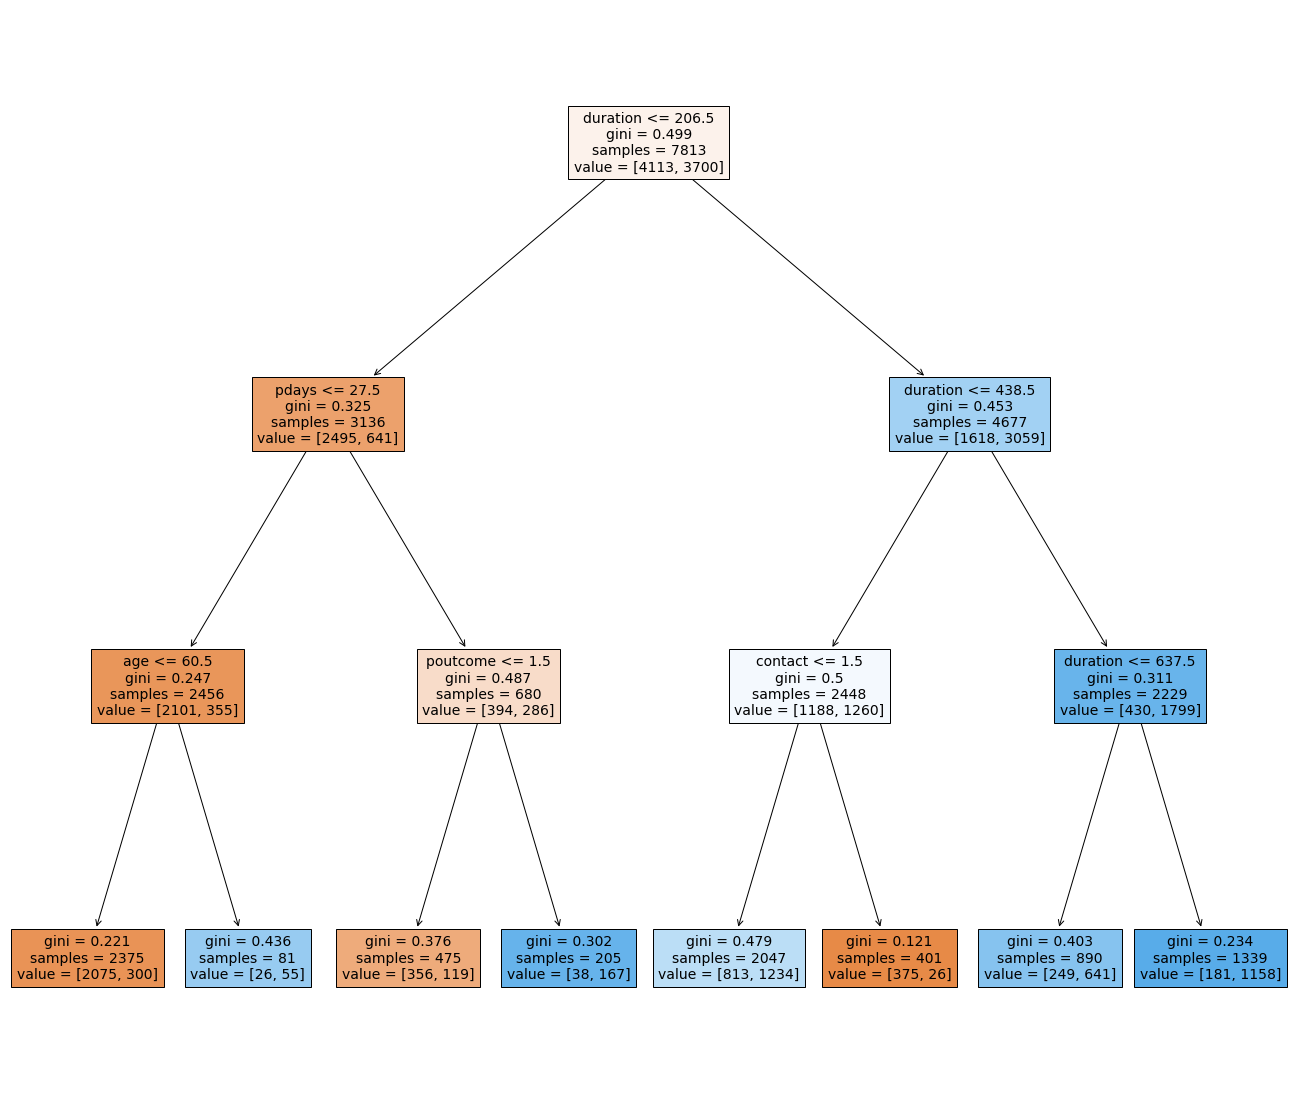

In [41]:
fig=plt.figure(figsize=(23,20)) 
#23 width and 20 height :define graph's page size
_=tree.plot_tree(dt2,feature_names=features,filled=True)
#tree_plot() inbuilt function of tree class

In [42]:
#second pruning tech. : min_samples_leaf
#How many minimum samples should be there in the leaf node
#min_samples_leaf=45 to 50  atleast 50 but can br more than 50 

In [43]:
#create object of DecisionTreeClassifier class
dt3=DecisionTreeClassifier(min_samples_leaf=45)  #by default GINI Index

In [44]:
#Call function
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [45]:
dt3.feature_importances_

array([0.04391835, 0.004888  , 0.        , 0.00197906, 0.        ,
       0.02158214, 0.06832936, 0.00314324, 0.10535663, 0.0050577 ,
       0.10912589, 0.49618493, 0.0006996 , 0.04406614, 0.0226653 ,
       0.07300365])

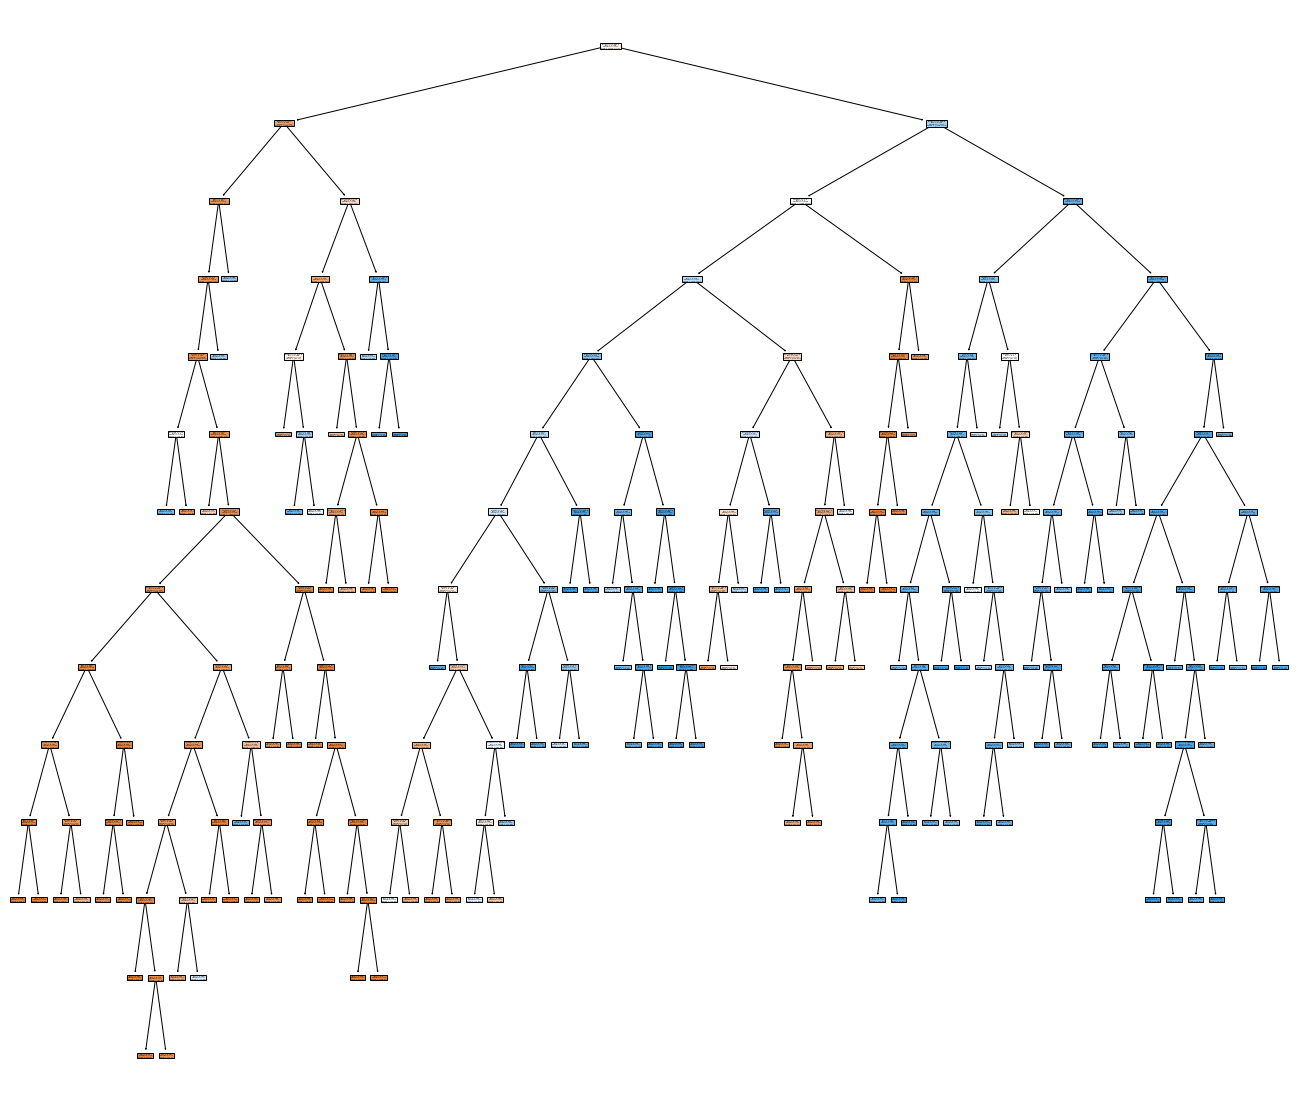

In [48]:
fig=plt.figure(figsize=(23,20)) 
#23 width and 20 height :define graph's page size
_=tree.plot_tree(dt3,feature_names=features,filled=True)
#tree_plot() inbuilt function of tree class

In [49]:
#create object of DecisionTreeClassifier class (entropy)
dt4=DecisionTreeClassifier(min_samples_leaf=45,criterion="entropy") 

In [50]:
#call function
dt4=create_model(dt4)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1760
           1       0.80      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [51]:
dt4.feature_importances_  #show information gain

array([0.02490857, 0.01172528, 0.        , 0.00176407, 0.        ,
       0.0278128 , 0.06046172, 0.00259956, 0.14175152, 0.0140897 ,
       0.11286384, 0.50159539, 0.00872649, 0.04793662, 0.01832603,
       0.02543841])

In [52]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

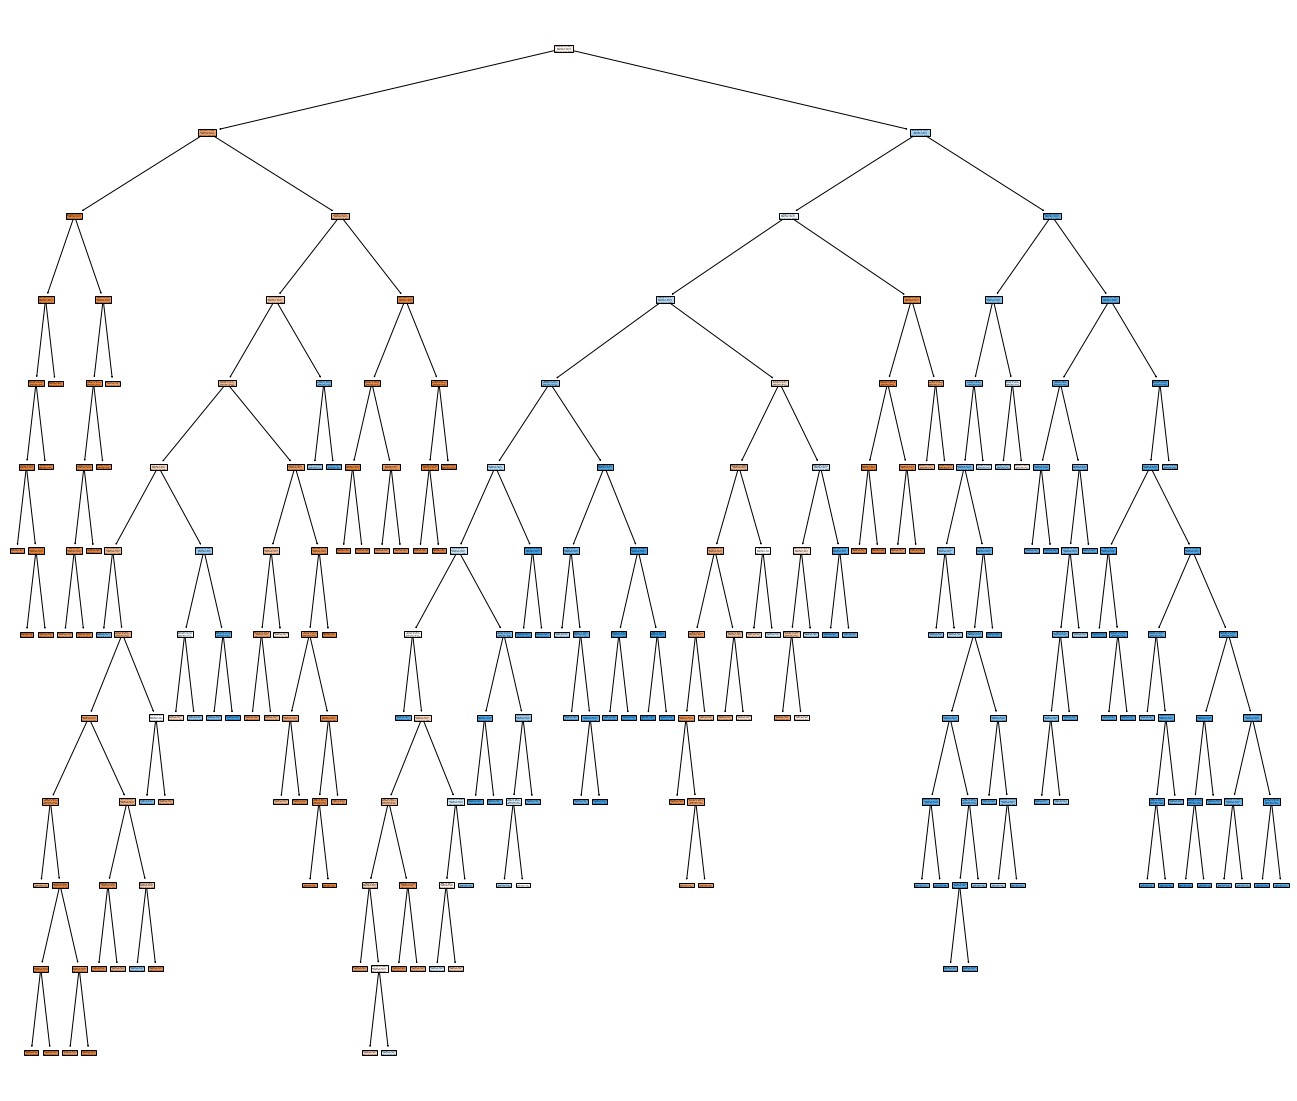

In [53]:
fig=plt.figure(figsize=(23,20)) 
#23 width and 20 height :define graph's page size
_=tree.plot_tree(dt4,feature_names=features,filled=True)
#tree_plot() inbuilt function of tree class

In [54]:
#use pruning tech of DT : best min_samples_leaf=45  (object dt3)
#with gini index : recall=0.87    in this dataset bank.csv